In [1]:
import pandas as pd
from scipy import stats

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import csv


from IPython.display import display, Math
from helper_functions import true_column_name

### Survey Contents

In [2]:
responses = pd.read_csv('../archive/responses.csv')

In [3]:
responses.describe()

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
count,1007.000000,1008.000000,1006.000000,1005.000000,1005.000000,1003.000000,1008.000000,1007.000000,1004.000000,1007.000000,...,1008.000000,1008.000000,1007.000000,1007.000000,1010.000000,1008.00000,1003.000000,990.000000,990.000000,1004.000000
mean,4.731877,3.328373,3.113320,2.288557,2.123383,2.956132,2.761905,3.471698,3.761952,2.361470,...,3.234127,3.050595,3.201589,3.106256,2.870297,3.55754,20.433699,173.514141,66.405051,1.297809
std,0.664049,0.833931,1.170568,1.138916,1.076136,1.252570,1.260845,1.161400,1.184861,1.372995,...,1.323062,1.306321,1.188947,1.205368,1.284970,1.09375,2.828840,10.024505,13.839561,1.013348
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,15.000000,62.000000,41.000000,0.000000
25%,5.000000,3.000000,2.000000,1.000000,1.000000,2.000000,2.000000,3.000000,3.000000,1.000000,...,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,19.000000,167.000000,55.000000,1.000000
50%,5.000000,3.000000,3.000000,2.000000,2.000000,3.000000,3.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,4.00000,20.000000,173.000000,64.000000,1.000000
75%,5.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,5.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,4.000000,4.00000,22.000000,180.000000,75.000000,2.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,30.000000,203.000000,165.000000,10.000000


### Extracting Demographics into sub-dataframe

In [4]:
print(list(responses)[:])

['Music', 'Slow songs or fast songs', 'Dance', 'Folk', 'Country', 'Classical music', 'Musical', 'Pop', 'Rock', 'Metal or Hardrock', 'Punk', 'Hiphop, Rap', 'Reggae, Ska', 'Swing, Jazz', 'Rock n roll', 'Alternative', 'Latino', 'Techno, Trance', 'Opera', 'Movies', 'Horror', 'Thriller', 'Comedy', 'Romantic', 'Sci-fi', 'War', 'Fantasy/Fairy tales', 'Animated', 'Documentary', 'Western', 'Action', 'History', 'Psychology', 'Politics', 'Mathematics', 'Physics', 'Internet', 'PC', 'Economy Management', 'Biology', 'Chemistry', 'Reading', 'Geography', 'Foreign languages', 'Medicine', 'Law', 'Cars', 'Art exhibitions', 'Religion', 'Countryside, outdoors', 'Dancing', 'Musical instruments', 'Writing', 'Passive sport', 'Active sport', 'Gardening', 'Celebrities', 'Shopping', 'Science and technology', 'Theatre', 'Fun with friends', 'Adrenaline sports', 'Pets', 'Flying', 'Storm', 'Darkness', 'Heights', 'Spiders', 'Snakes', 'Rats', 'Ageing', 'Dangerous dogs', 'Fear of public speaking', 'Smoking', 'Alcohol',

In [5]:
demographics = pd.DataFrame([responses.Age, 
                            responses.Height,
                            responses.Weight,
                            responses['Number of siblings'],
                            responses.Gender,
                            responses['Left - right handed'],
                            responses.Education,
                            responses['Only child'],
                            responses['Village - town'],
                            responses['House - block of flats']]).transpose()
demographics = demographics.rename(columns = {"Education": "Highest Education Completed", 
                                              "Village - town": "Spend childhood in a ", 
                                              "House - block of flats": "Lived childhood in a"})

demographics.sample(5)

,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Highest Education Completed,Only child,Spend childhood in a,Lived childhood in a
250,20.0,176.0,63.0,0.0,female,right handed,secondary school,yes,city,block of flats
779,17.0,167.0,48.0,0.0,female,right handed,secondary school,yes,village,house/bungalow
659,20.0,NaN,65.0,1.0,male,right handed,secondary school,no,village,house/bungalow
257,19.0,182.0,65.0,2.0,male,right handed,secondary school,no,city,block of flats
356,18.0,185.0,74.0,1.0,male,left handed,secondary school,no,city,house/bungalow


In [6]:
demographics.isnull().sum()

Age                             7
Height                         20
Weight                         20
Number of siblings              6
Gender                          6
Left - right handed             3
Highest Education Completed     1
Only child                      2
Spend childhood in a            4
Lived childhood in a            4
dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

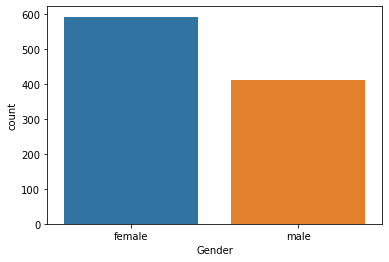

In [7]:
sns.countplot(data = demographics, x = 'Gender')

In [8]:
demographics['Age'].value_counts().sort_index()

15.0     11
16.0     29
17.0     53
18.0    123
19.0    210
20.0    194
21.0    127
22.0     84
23.0     47
24.0     28
25.0     30
26.0     15
27.0     14
28.0     17
29.0     11
30.0     10
Name: Age, dtype: int64

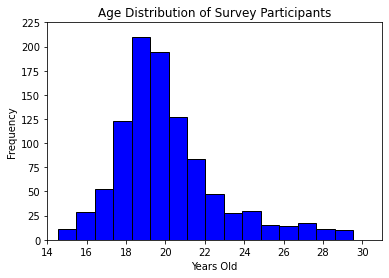

In [9]:
plt.hist(demographics['Age'], bins = 16, align='left', color='b', edgecolor='black',
              linewidth=1)

plt.xlim(14, 31)
plt.ylim(0, 225)

plt.xlabel("Years Old")
plt.ylabel("Frequency")
plt.title("Age Distribution of Survey Participants")
plt.show()


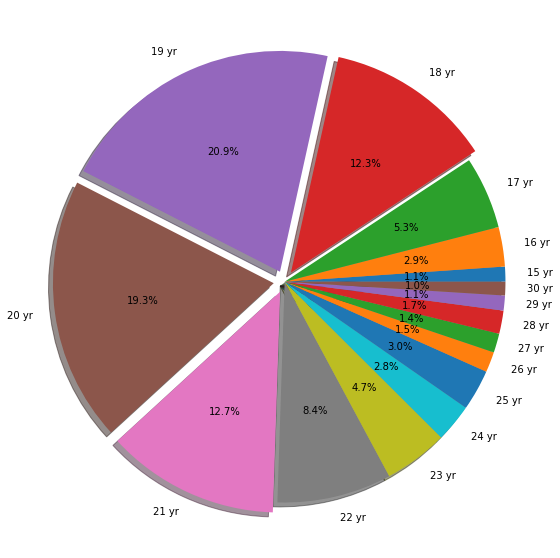

In [10]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
labels = ['15 yr', '16 yr', '17 yr', '18 yr', '19 yr', '20 yr', '21 yr', '22 yr', '23 yr', '24 yr', '25 yr', '26 yr', '27 yr', '28 yr', '29 yr', '30 yr']
sizes = np.array([demographics['Age'].value_counts(normalize=True).sort_index()]).flatten()
explode = (0, 0, 0, 0.05, 0.05, 0.05, 0.05, 0, 0, 0, 0 ,0 ,0 ,0 ,0 ,0) 
# only "explode" the 2nd slice (i.e. 'Hogs')

fig1, ax1 = plt.subplots(figsize = (9, 10))
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=0)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

### Extracting Survey answers into dataframe name preferences.

#### Reverting Column names to original survey names

In [11]:
mydict = true_column_name()
mydict

{'short': 'original',
 'Music': 'I enjoy listening to music.',
 'Slow songs or fast songs': 'I prefer.',
 'Dance': 'Dance, Disco, Funk',
 'Folk': 'Folk music',
 'Country': 'Country',
 'Classical music': 'Classical',
 'Musical': 'Musicals',
 'Pop': 'Pop',
 'Rock': 'Rock',
 'Metal or Hardrock': 'Metal, Hard rock',
 'Punk': 'Punk',
 'Hiphop, Rap': 'Hip hop, Rap',
 'Reggae, Ska': 'Reggae, Ska',
 'Swing, Jazz': 'Swing, Jazz',
 'Rock n roll': 'Rock n Roll',
 'Alternative': 'Alternative music',
 'Latino': 'Latin',
 'Techno, Trance': 'Techno, Trance',
 'Opera': 'Opera',
 'Movies': 'I really enjoy watching movies.',
 'Horror': 'Horror movies',
 'Thriller': 'Thriller movies',
 'Comedy': 'Comedies',
 'Romantic': 'Romantic movies',
 'Sci-fi': 'Sci-fi movies',
 'War': 'War movies',
 'Fantasy/Fairy tales': 'Tales',
 'Animated': 'Cartoons',
 'Documentary': 'Documentaries',
 'Western': 'Western movies',
 'Action': 'Action movies',
 'History': 'History',
 'Psychology': 'Psychology',
 'Politics': 'Polit

In [13]:
preferences = pd.DataFrame([responses[x] for x in list(responses)[:140]]).transpose()
preferences = preferences.rename(columns = mydict)

### Split Preferences into seperate dataframes for future use.

In [19]:
music = pd.DataFrame([preferences[x] for x in list(preferences)[:19]]).transpose()
# music.sample(3)

movies = pd.DataFrame([preferences[x] for x in list(preferences)[19:31]])
# movies.head(3)

hobbs_and_intrs = pd.DataFrame([preferences[x] for x in list(preferences)[31:63]])
# hobbs_and_intrs.sample(3)

phobias = pd.DataFrame([preferences[x] for x in list(preferences)[63:73]]).transpose()
# phobias.sample(3)

health_habits = pd.DataFrame([preferences[x] for x in list(preferences)[73:76]])
# health_habits.sample(3)

personality_views_opinions = pd.DataFrame([preferences[x] for x in list(preferences)[76:133]])
# personality_views_opinions.head().sample(3)

spending_habits = pd.DataFrame([preferences[x] for x in list(preferences)[133:140]]).transpose()
spending_habits.sample(3)

,I save all the money I can.,I enjoy going to large shopping centres.,I prefer branded clothing to non branded.,I spend a lot of money on partying and socializing.,I spend a lot of money on my appearance.,I spend a lot of money on gadgets.,"I will hapilly pay more money for good, quality or healthy food."
458,3.0,3.0,3.0,1.0,2.0,1.0,3.0
648,3.0,2.0,2.0,4.0,4.0,3.0,4.0
294,3.0,2.0,3.0,2.0,3.0,2.0,5.0


In [20]:
phobias 

,Flying,"Thunder, lightning",Darkness,Heights,Spiders,Snakes,"Rats, mice",Ageing,Dangerous dogs,Public speaking
0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,3.0,2.0
1,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,4.0
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0
3,2.0,1.0,1.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0
4,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0
...,...,...,...,...,...,...,...,...,...,...
1005,1.0,2.0,4.0,5.0,2.0,2.0,2.0,3.0,3.0,4.0
1006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,5.0
1007,2.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0
1008,2.0,3.0,2.0,5.0,3.0,3.0,3.0,3.0,5.0,5.0


### Focusing on only Phobias

In [21]:
fly_counts = phobias["Flying"].value_counts()
print(fly_counts.sort_index()) #type(item_counts) -> pandas.core.series.Series

1.0    463
2.0    207
3.0    207
4.0     72
5.0     58
Name: Flying, dtype: int64


In [22]:
phobias1 = phobias.copy()
phobias1['Gender'] = demographics['Gender']
phobias1[['Flying', 'Gender']].sample(5)

,Flying,Gender
237,1.0,female
759,3.0,male
576,1.0,male
458,5.0,female
706,3.0,male


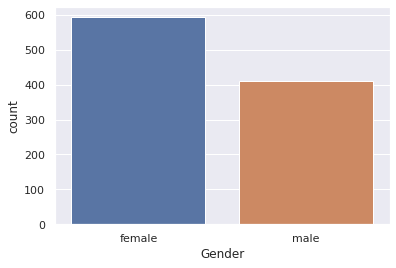

In [23]:
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = phobias1['Gender'], data=phobias1)

In [24]:
female_phob1 = phobias.copy()
female_phob1['Gender'] = demographics['Gender']
female_phob1 = female_phob1.loc[female_phob1['Gender'] == 'female'].copy()
female_phob1

,Flying,"Thunder, lightning",Darkness,Heights,Spiders,Snakes,"Rats, mice",Ageing,Dangerous dogs,Public speaking,Gender
0,1.0,1.0,1.0,1.0,1.0,5.0,3.0,1.0,3.0,2.0,female
1,1.0,1.0,1.0,2.0,1.0,1.0,1.0,3.0,1.0,4.0,female
2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,female
3,2.0,1.0,1.0,3.0,5.0,5.0,5.0,4.0,5.0,5.0,female
4,1.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,4.0,3.0,female
...,...,...,...,...,...,...,...,...,...,...,...
1001,5.0,1.0,1.0,5.0,1.0,1.0,1.0,4.0,2.0,2.0,female
1003,4.0,1.0,1.0,4.0,4.0,5.0,4.0,1.0,3.0,2.0,female
1005,1.0,2.0,4.0,5.0,2.0,2.0,2.0,3.0,3.0,4.0,female
1007,2.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,5.0,female


In [25]:
male_phob1 = phobias.copy()
male_phob1['Gender'] = demographics['Gender']
male_phob1 = male_phob1.loc[male_phob1['Gender'] == 'male'].copy()
male_phob1

,Flying,"Thunder, lightning",Darkness,Heights,Spiders,Snakes,"Rats, mice",Ageing,Dangerous dogs,Public speaking,Gender
5,3.0,2.0,2.0,2.0,1.0,2.0,2.0,1.0,1.0,3.0,male
7,3.0,2.0,4.0,3.0,1.0,5.0,3.0,1.0,2.0,4.0,male
15,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,male
18,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,male
19,3.0,2.0,2.0,4.0,4.0,2.0,2.0,2.0,2.0,3.0,male
...,...,...,...,...,...,...,...,...,...,...,...
999,2.0,1.0,1.0,NaN,2.0,2.0,1.0,1.0,2.0,1.0,male
1002,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,4.0,male
1004,1.0,1.0,2.0,3.0,3.0,2.0,2.0,3.0,2.0,3.0,male
1006,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,5.0,5.0,male


In [27]:
male_phob1['Male vs Flying'] = male_phob1['Flying']
female_phob1['Female vs Flying'] = female_phob1['Flying']

new_df = pd.DataFrame([female_phob1['Female vs Flying'].value_counts().sort_index(), male_phob1['Male vs Flying'].value_counts().sort_index()])
new_df

,1.0,2.0,3.0,4.0,5.0
Female vs Flying,241,132,133,50,36
Male vs Flying,222,73,74,20,20


In [29]:
arr_f = np.array([female_phob1['Flying'].value_counts().sort_index()])
arr_m = np.array([male_phob1['Flying'].value_counts().sort_index()])


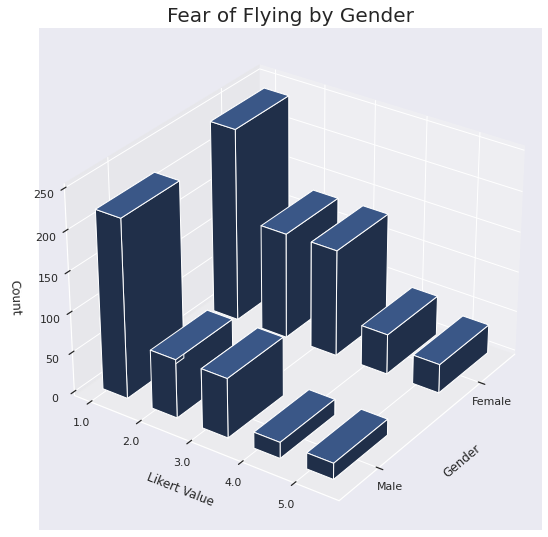

<Figure size 432x288 with 0 Axes>

In [33]:
fig = plt.figure(figsize = (9, 10))
ax = fig.add_subplot(111, projection ="3d")


x = np.array([1,2])
y = np.array([1, 2, 3, 4, 5])              # correct

xpos, ypos = np.meshgrid(x, y)

z = np.array([arr_m.flatten(), arr_f.flatten()])

xpos = xpos.flatten()
ypos = ypos.flatten()
zpos = np.zeros_like(xpos)

dx = 0.5*np.ones_like(zpos)
dy = dx.copy()
dz = np.array([241, 222, 132, 73, 133, 74, 50, 20, 36, 20])

ax.set_xticks([2.25, 1.25])
ax.set_xticklabels(['Male', 'Female'])

ax.set_yticks([1, 2, 3, 4, 5])
ax.set_yticklabels(['1.0', '2.0', '3.0', '4.0', '5.0'])


ax.set_zlim(0,250)

ax.view_init(azim = 35)

ax.set_title("Fear of Flying by Gender", fontsize =20)
ax.set_xlabel("Gender", labelpad =10)
ax.set_ylabel("Likert Value", labelpad =10)
ax.set_zlabel("Count", labelpad =10)

ax.bar3d(xpos, ypos, zpos, dx, dy, dz)

plt.show()
plt.savefig("../img/FearvsGender.png")